# Data Cleaning and Feature Engineering 

In [1]:
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats
from sklearn.model_selection import train_test_split

# Visualization Modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Regressor Modules
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [2]:
# Load training dataset 
loan = pd.read_csv("Data for Cleaning & Modeling.csv")
loan.info()

/Users/arielsmac/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
X1     338990 non-null object
X2     399999 non-null float64
X3     399999 non-null float64
X4     399999 non-null object
X5     399999 non-null object
X6     399999 non-null object
X7     399999 non-null object
X8     338730 non-null object
X9     338730 non-null object
X10    376014 non-null object
X11    382462 non-null object
X12    338639 non-null object
X13    338972 non-null float64
X14    399999 non-null object
X15    399999 non-null object
X16    123560 non-null object
X17    399999 non-null object
X18    399981 non-null object
X19    399999 non-null object
X20    399999 non-null object
X21    399999 non-null float64
X22    399999 non-null float64
X23    399999 non-null object
X24    399999 non-null float64
X25    181198 non-null float64
X26    51155 non-null float64
X27    399999 non-null float64
X28    399999 non-null float64
X29    399999 non-null float64
X30    39

In [3]:
loan.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f
5,19.05%,58524.0,149512.0,"$7,200","$7,200","$7,200",36 months,D,D4,Arkwright,...,Apr-94,0.0,26.0,NaN,6.0,0.0,3874.0,90.10%,25.0,f
6,10.08%,58915.0,153417.0,"$7,500","$5,025",$557,36 months,B,B3,QUalcomm Inc,...,Nov-00,1.0,NaN,NaN,3.0,0.0,33667.0,73.20%,11.0,f
7,14.26%,59006.0,154254.0,"$3,000","$3,000","$2,988",36 months,C,C5,NaN,...,Jul-98,0.0,13.0,0.0,13.0,0.0,4740.0,39.50%,23.0,f
8,7.88%,61390.0,182594.0,"$4,000","$4,000","$3,900",36 months,A,A5,NaN,...,May-93,0.0,NaN,NaN,11.0,0.0,50807.0,51%,19.0,f
9,14.96%,61419.0,182917.0,"$5,600","$5,600","$5,525",36 months,D,D2,Pension Benefit Guaranty Corporation,...,Jun-01,0.0,38.0,63.0,5.0,1.0,3839.0,76.80%,9.0,f


In [4]:
loan.isnull().sum()

X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23986
X11     17538
X12     61361
X13     61028
X14         1
X15         1
X16    276440
X17         1
X18        19
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64

In [5]:
# Load test dataset 
holdout = pd.read_csv("Holdout for Testing.csv")
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
X1     0 non-null float64
X2     80000 non-null int64
X3     80000 non-null int64
X4     80000 non-null object
X5     80000 non-null object
X6     80000 non-null object
X7     80000 non-null object
X8     80000 non-null object
X9     80000 non-null object
X10    75606 non-null object
X11    75618 non-null object
X12    80000 non-null object
X13    80000 non-null float64
X14    80000 non-null object
X15    80000 non-null object
X16    15 non-null object
X17    80000 non-null object
X18    80000 non-null object
X19    80000 non-null object
X20    80000 non-null object
X21    80000 non-null float64
X22    80000 non-null int64
X23    80000 non-null object
X24    80000 non-null int64
X25    41296 non-null float64
X26    13839 non-null float64
X27    80000 non-null int64
X28    80000 non-null int64
X29    80000 non-null int64
X30    79970 non-null object
X31    80000 non-null int64
X3

In [6]:
holdout.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [7]:
holdout.isnull().sum()

X1     80000
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10     4394
X11     4382
X12        0
X13        0
X14        0
X15        0
X16    79985
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25    38704
X26    66161
X27        0
X28        0
X29        0
X30       30
X31        0
X32        0
dtype: int64

In [8]:
# X1: Interest rate on loan. This is our response variable. 
# For loan dataset, drop rows with missing values. Remove percentage sign and change datatype to numeric. 
loan = loan.dropna(subset=['X1'])
loan['X1'] = pd.to_numeric(loan['X1'].str.replace('%', ''))

# For holdout dataset, this is our target variable so I'll drop the entire column. 
holdout.drop(['X1'], axis=1, inplace=True)

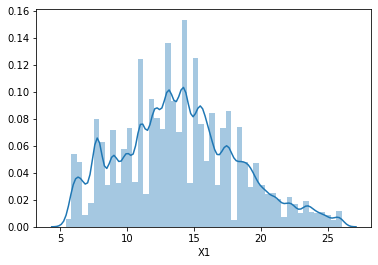

In [9]:
# Distribution of interest rates 
sns.distplot(loan['X1'])

In [10]:
# X2 and X3: Unique ID for loan and borrower. Not conducive to building model. 
# Drop these columns from both datasets. 
loan.drop(['X2','X3'], axis=1, inplace=True)
holdout.drop(['X2','X3'], axis=1, inplace=True)

In [11]:
# X16: Reason for loan provided by borrower. This column has large numbers of missing values (more than 50%) in both datasets. 
# And is a unique text type that complicates our model. Drop this column from both datasets. 
loan.drop(['X16'], axis=1, inplace=True)
holdout.drop(['X16'], axis=1, inplace=True)

In [12]:
loan.isnull().sum()

X1          0
X4          1
X5          1
X6          1
X7          1
X8      51867
X9      51867
X10     20257
X11     14795
X12     51960
X13     51752
X14         1
X15         1
X17         1
X18        17
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    185457
X26    295590
X27         1
X28         1
X29         1
X30       225
X31         1
X32         1
dtype: int64

In [13]:
# X25 and X26: Number of months since last delinquency and public records. Seems rather important. 
# I'm going to impute with median in both datasets.
loan['X25'] = loan['X25'].fillna(loan['X25'].median())
loan['X26'] = loan['X26'].fillna(loan['X26'].median())

holdout['X25'] = holdout['X25'].fillna(holdout['X25'].median())
holdout['X26'] = holdout['X26'].fillna(holdout['X26'].median())

In [14]:
# X13: Borrower annual income. This is a very important variable so we can't simply impute with overall mean or median.
# Instead, I'm going to find the mean of annual income of people that belong to different loan subgrades and impute that way. 
loan['X13'].fillna(loan.groupby('X9')['X13'].transform('mean'), inplace = True)
holdout['X13'].fillna(loan.groupby('X9')['X13'].transform('mean'), inplace = True)

In [15]:
loan.isnull().sum()

X1         0
X4         1
X5         1
X6         1
X7         1
X8     51867
X9     51867
X10    20257
X11    14795
X12    51960
X13     7762
X14        1
X15        1
X17        1
X18       17
X19        1
X20        1
X21        1
X22        1
X23        1
X24        1
X25        0
X26        0
X27        1
X28        1
X29        1
X30      225
X31        1
X32        1
dtype: int64

In [16]:
# X8 and X9: Loan grade and subgrade. These variables seem valuable. 
# Don't want to impute missing values in important variables. So I'll drop them from loan dataset.
loan.dropna(subset=['X8'], inplace=True)

# Convert them into numeric variables in both datasets. 
grade = {'A':1.0,'B':2.0,'C':3.0,'D':4.0,'E':5.0,'F':6.0,'G':7.0}
grade_cat = {'A1':11,'A2':12,'A3':13,'A4':14,'A5':15,
            'B1':21,'B2':22,'B3':23,'B4':24,'B5':25,
            'C1':31,'C2':32,'C3':33,'C4':34,'C5':35,
            'D1':41,'D2':42,'D3':43,'D4':44,'D5':45,
            'E1':51,'E2':52,'E3':53,'E4':54,'E5':55,
            'F1':61,'F2':62,'F3':63,'F4':64,'F5':65,
            'G1':70,'G2':70,'G3':70,'G4':70,'G5':70}

loan['X8'] = loan['X8'].replace(grade)
loan['X8'] = pd.to_numeric(loan['X8'])

loan['X9'] = loan['X9'].replace(grade_cat)
loan['X9'] = pd.to_numeric(loan['X9'])

holdout['X8'] = holdout['X8'].replace(grade)
holdout['X8'] = pd.to_numeric(holdout['X8'])

holdout['X9'] = holdout['X9'].replace(grade_cat)
holdout['X9'] = pd.to_numeric(holdout['X9'])

#loan['X9'] = loan[np.isfinite(loan['X9'])]
#holdout['X9'] = holdout[np.isfinite(holdout['X9'])]

In [17]:
loan.isnull().sum()

X1         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10    17073
X11    12451
X12    44128
X13        0
X14        0
X15        0
X17        0
X18       12
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25        0
X26        0
X27        0
X28        0
X29        0
X30      178
X31        0
X32        0
dtype: int64

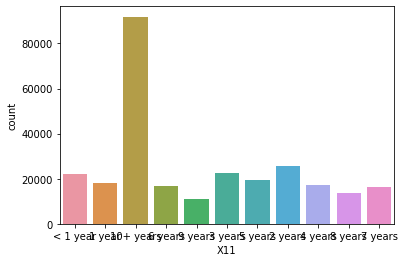

In [18]:
# X11: Number of years employed.
sns.countplot(loan['X11'])

# Convert to numeric and impute with median in both datasets. 
loan['X11'] = loan['X11'].str.extract('(\d+)')
loan['X11'] = pd.to_numeric(loan['X11'])
loan['X11'] = loan['X11'].fillna(loan['X11'].median())

holdout['X11'] = holdout['X11'].str.extract('(\d+)')
holdout['X11'] = pd.to_numeric(holdout['X11'])
holdout['X11'] = holdout['X11'].fillna(holdout['X11'].median())



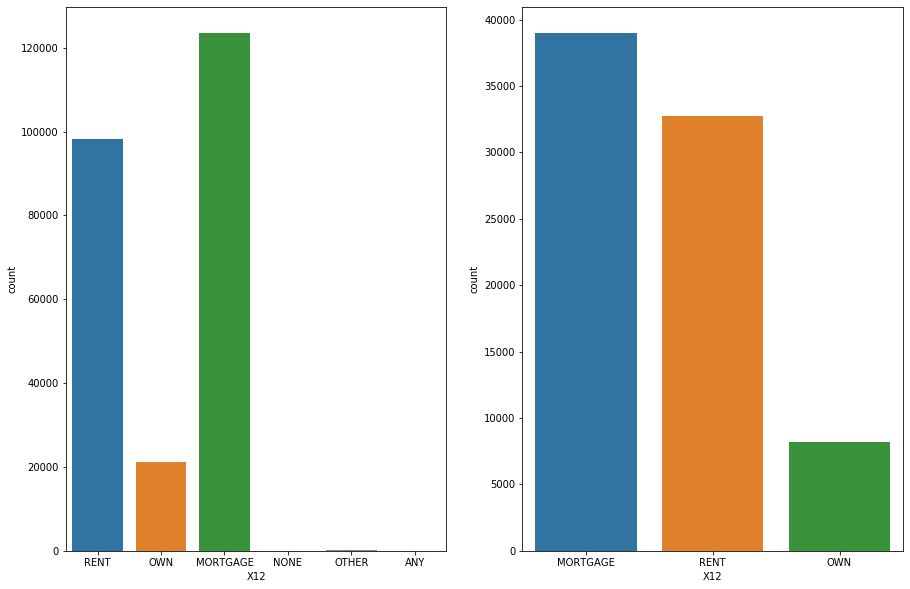

In [19]:
# X12: Home ownership status.
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,10))
sns.countplot(loan['X12'], ax = axis1)
sns.countplot(holdout['X12'],ax = axis2)

# 6 categories in training data vs. 3 categories in test data 

In [20]:
# X12: Create dummy variables 
ownership_dummies = pd.get_dummies(loan['X12'])
# There's very few counts in the none, any and other categories in loan dataset, so I'll drop them
ownership_dummies = ownership_dummies.drop(['NONE','ANY','OTHER'], axis = 1)
loan = loan.join(ownership_dummies)
loan.drop(['X12'], axis = 1, inplace = True)

ownership_dummies_holdout = pd.get_dummies(holdout['X12'])
holdout = holdout.join(ownership_dummies_holdout)
holdout.drop(['X12'], axis = 1, inplace = True)

In [21]:
# X30: Revolving line utilization rate. Small amounts of missing values in both datasets so I'll impute with mean. 
# Convert data type to numeric and impute with mean.  
loan['X30'] = pd.to_numeric(loan['X30'].str.replace('%', ''))/100
loan['X30'] = loan['X30'].fillna(loan['X30'].mean())

holdout['X30'] = pd.to_numeric(holdout['X30'].str.replace('%', ''))/100
holdout['X30'] = holdout['X30'].fillna(holdout['X30'].median())

In [22]:
# X19: First 3 numbers of zipcode. Convert to numeric in both datasets
loan['X19'] = pd.to_numeric(loan['X19'].str.replace('xx', ''))
holdout['X19'] = pd.to_numeric(holdout['X19'].str.replace('xx', ''))

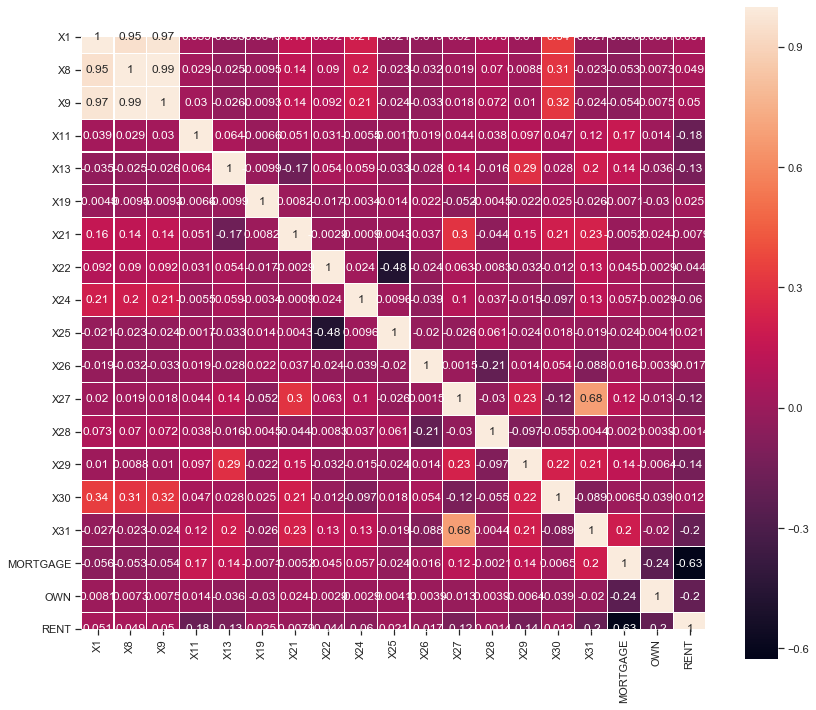

In [23]:
# Heatmap
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(loan.corr('pearson', min_periods = 1), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

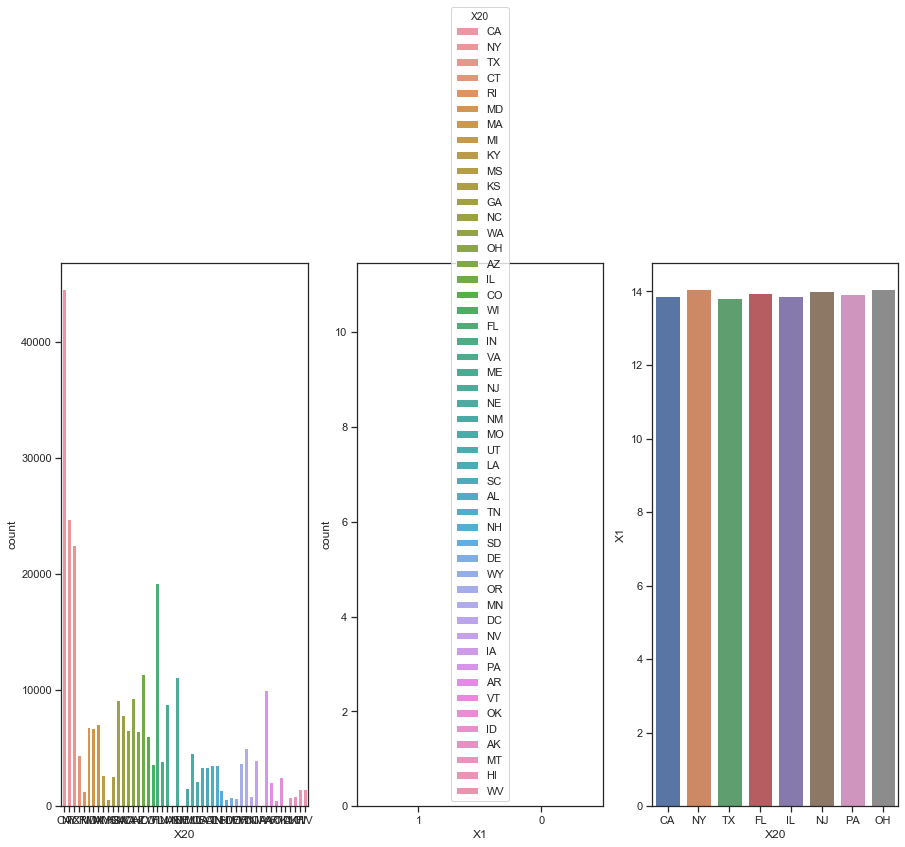

In [24]:
# X20: State of borrower. Let's visualize this variable first to get some understanding 
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize = (15,10))
sns.countplot(x = 'X20', data = loan, ax = axis1)
sns.countplot(x = 'X1', hue = 'X20', data = loan, order = [1,0], ax = axis2)
state = loan[['X20','X1']].groupby(['X20'], as_index = False).mean()
sns.barplot(x = 'X20', y = 'X1', data = state, order = ['CA','NY','TX','FL','IL','NJ','PA','OH'],ax = axis3)
# For the most frequent states of borrowers, there's not much difference in interest rate. 

In [25]:
# X20: Convert to numeric values using label encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fit = le.fit(loan['X20'])
loan['X20'] = fit.transform(loan['X20'])
holdout['X20'] = fit.transform(holdout['X20'])

In [26]:
# X10: Employer or job title. Has lots of missing values and the data itself is hard to incorporate to our model. 
# Drop this column from both datasets. 
loan.drop(['X10'], axis=1, inplace=True)
holdout.drop(['X10'], axis=1, inplace=True)

In [27]:
# X15: Date loan was issued. There might be slight fluctuations but it shouldn't have a huge impact on interest rate.
loan.drop(['X15'], axis=1, inplace=True)
holdout.drop(['X15'], axis=1, inplace=True)

In [28]:
# X23: Date the borrower's earliest credit line was opened. This isn't as important as income or employment data. 
loan.drop(['X23'], axis=1, inplace=True)
holdout.drop(['X23'], axis=1, inplace=True)

In [29]:
# X18: Loan title provided by borrower. Not conducive to our model. 
loan.drop(['X18'], axis=1, inplace=True)
holdout.drop(['X18'], axis=1, inplace=True)

In [30]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287123 entries, 0 to 399999
Data columns (total 27 columns):
X1          287123 non-null float64
X4          287123 non-null object
X5          287123 non-null object
X6          287123 non-null object
X7          287123 non-null object
X8          287123 non-null float64
X9          287123 non-null int64
X11         287123 non-null float64
X13         287123 non-null float64
X14         287123 non-null object
X17         287123 non-null object
X19         287123 non-null int64
X20         287123 non-null int64
X21         287123 non-null float64
X22         287123 non-null float64
X24         287123 non-null float64
X25         287123 non-null float64
X26         287123 non-null float64
X27         287123 non-null float64
X28         287123 non-null float64
X29         287123 non-null float64
X30         287123 non-null float64
X31         287123 non-null float64
X32         287123 non-null object
MORTGAGE    287123 non-null uint8
OWN 

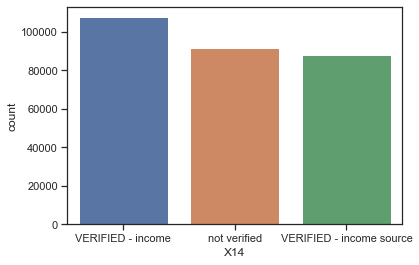

In [31]:
# X14: Income verification. This seems valuable. Use label encoding to convert to numeric values 
sns.countplot(loan['X14'])

le = LabelEncoder()
fit = le.fit(loan['X14'])
loan['X14'] = fit.transform(loan['X14'])
holdout['X14'] = fit.transform(holdout['X14'])

In [32]:
# X17: Loan category. 
print(loan['X17'].value_counts())
# Again use label encoding to convert to numeric values.
le = LabelEncoder()
fit = le.fit(loan['X17'])
loan['X17'] = fit.transform(loan['X17'])
holdout['X17'] = fit.transform(holdout['X17'])

debt_consolidation    167815
credit_card            64107
home_improvement       16636
other                  14564
major_purchase          6191
small_business          4560
car                     3510
medical                 2807
moving                  1806
wedding                 1634
vacation                1557
house                   1452
educational              244
renewable_energy         240
Name: X17, dtype: int64


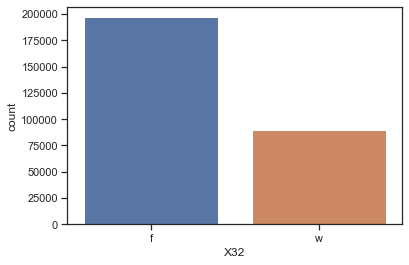

In [33]:
# X32: Initial listing status of loan. 
sns.countplot(loan['X32'])

le = LabelEncoder()
fit = le.fit(loan['X32'])
loan['X32'] = fit.transform(loan['X32'])
holdout['X32'] = fit.transform(holdout['X32'])

In [34]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287123 entries, 0 to 399999
Data columns (total 27 columns):
X1          287123 non-null float64
X4          287123 non-null object
X5          287123 non-null object
X6          287123 non-null object
X7          287123 non-null object
X8          287123 non-null float64
X9          287123 non-null int64
X11         287123 non-null float64
X13         287123 non-null float64
X14         287123 non-null int64
X17         287123 non-null int64
X19         287123 non-null int64
X20         287123 non-null int64
X21         287123 non-null float64
X22         287123 non-null float64
X24         287123 non-null float64
X25         287123 non-null float64
X26         287123 non-null float64
X27         287123 non-null float64
X28         287123 non-null float64
X29         287123 non-null float64
X30         287123 non-null float64
X31         287123 non-null float64
X32         287123 non-null int64
MORTGAGE    287123 non-null uint8
OWN    

In [35]:
# Convert features to numeric data types in the loan dataset 
loan['X4'] = loan['X4'].str.replace('$', '')
loan['X4'] = pd.to_numeric(loan['X4'].str.replace(',', ''))

loan['X5'] = loan['X5'].str.replace('$', '')
loan['X5'] = pd.to_numeric(loan['X5'].str.replace(',', ''))

loan['X6'] = loan['X6'].str.replace('$', '')
loan['X6'] = pd.to_numeric(loan['X6'].str.replace(',', ''))

loan['X7'] = loan['X7'].str.replace(' months', '')
loan['X7'] = pd.to_numeric(loan['X7'])

In [36]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 26 columns):
X4          80000 non-null object
X5          80000 non-null object
X6          80000 non-null object
X7          80000 non-null object
X8          80000 non-null float64
X9          80000 non-null int64
X11         80000 non-null float64
X13         80000 non-null float64
X14         80000 non-null int64
X17         80000 non-null int64
X19         80000 non-null int64
X20         80000 non-null int64
X21         80000 non-null float64
X22         80000 non-null int64
X24         80000 non-null int64
X25         80000 non-null float64
X26         80000 non-null float64
X27         80000 non-null int64
X28         80000 non-null int64
X29         80000 non-null int64
X30         80000 non-null float64
X31         80000 non-null int64
X32         80000 non-null int64
MORTGAGE    80000 non-null uint8
OWN         80000 non-null uint8
RENT        80000 non-null uint8
dtypes: float64

In [37]:
# Convert features to numeric data types in the holdout dataset 
holdout['X4'] = holdout['X4'].str.replace('$', '')
holdout['X4'] = pd.to_numeric(holdout['X4'].str.replace(',', ''))

holdout['X5'] = holdout['X5'].str.replace('$', '')
holdout['X5'] = pd.to_numeric(holdout['X5'].str.replace(',', ''))

holdout['X6'] = holdout['X6'].str.replace('$', '')
holdout['X6'] = pd.to_numeric(holdout['X6'].str.replace(',', ''))

holdout['X7'] = holdout['X7'].str.replace(' months', '')
holdout['X7'] = pd.to_numeric(holdout['X7'])

def describe_categorical(X): 
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == 'object']].describe().to_html()))

## Build Machine Learning Model

In [38]:
from sklearn.model_selection import train_test_split

# First separate the training data predictors and response 
y = loan['X1']
X = loan.drop(['X1'], axis=1)

# Set seed for reproducibility and split into train and test data
SEED = 3
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state = SEED)

In [39]:
# Import regression libraries 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

# Import evaluation libraries
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

## Note: I only removed % for X1, so for an interest rate of 11%, X1 would appear as 11. Our RMSE measures the performance of models on target variables range between 0 - 100 (though realistically X1 should be 0-20).  

### Decision Tree

In [40]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.12, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Make predictions 
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

# Evaluate RMSE of train and test sets 
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)

# Evaluate 10-fold cross validation RMSE
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1) 
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

print('Test set RMSE of decision tree: {:.3f}'.format(rmse_test))
print('Train set RMSE of decision tree: {:.3f}'.format(rmse_train))
print('CV RMSE of decision tree: {:.3f}'.format(RMSE_CV))

Test set RMSE of decision tree: 1.304
Train set RMSE of decision tree: 1.306
CV RMSE of decision tree: 1.306


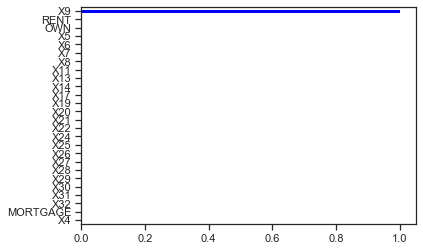

In [41]:
# Understand feature importance in decision tree model

importances_dt = pd.Series(dt.feature_importances_, index = X.columns)
sorted_importances_dt = importances_dt.sort_values()
sorted_importances_dt.plot(kind='barh', color='blue')
plt.show()

Decision tree regressor doesn't have problems with overfitting or underfitting. For feature importance, X9 pretty much shapes the whole model. As a machine learning algorithm, decision tree is not difficiult to implement as it doesn't require high levels of data pre-processing - no need for scaling or normalization of data. However, decision tree is somewhat inadequate when it comes to applying regression and predicting continuous variables. 

### Random Forest 

In [42]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

# Evaluate RMSE of train and test sets 
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)

# Evaluate 10-fold cross validation RMSE
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1) 
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

print('Test set RMSE of random forest: {:.3f}'.format(rmse_test))
print('Train set RMSE of random forest: {:.3f}'.format(rmse_train))
print('CV RMSE of random forest: {:.3f}'.format(RMSE_CV))

Test set RMSE of random forest: 1.576
Train set RMSE of random forest: 1.585
CV RMSE of random forest: 1.306


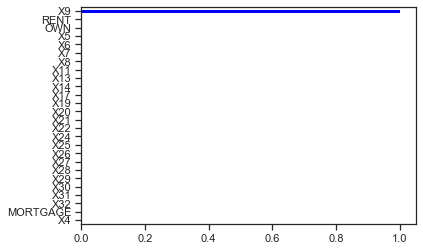

In [43]:
# Understand feature importance in random forest model

importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

Random forest model doesn't seem to suffer from overfitting. However, it is only using X9 as the sole predictor, thus it has slightly higher RMSE than the decision tree model. Random forest is good at handling large datasets with high dimensionality and the feature importance feature is very helpful when you have to reduce model complexity. Though I didn't use here, random forest allows for out-of-bag sampling which removes the need of a set-aside test set. The downside of random forest is that it requires relatively high computational power and, similar to decision tree, the regression doesn't provide very good predictions on continuous variables. It doesn't predict beyond the range in the training data.

### KNeighbors

In [44]:
# Instantiate knn
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', n_jobs=-1)

# Fit 'knn' to the training set
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

# Evaluate RMSE of train and test sets 
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)

# Evaluate 10-fold cross validation RMSE
MSE_CV_scores = - cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1) 
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

print('Test set RMSE of k-Neighbors: {:.3f}'.format(rmse_test))
print('Train set RMSE of k-Neighbors: {:.3f}'.format(rmse_train))
print('CV RMSE of k-Neighbors: {:.3f}'.format(RMSE_CV))

Test set RMSE of k-Neighbors: 4.417
Train set RMSE of k-Neighbors: 3.614
CV RMSE of k-Neighbors: 4.441


This KNN Regressor suffers from overfitting since the CV RMSE is greater than train RMSE, and the RMSE suggests that KNN performs poorly on our loan dataset. KNN is a simple and intuitive machine learning that is non-parametric (no assumptions) and requires no training step. However, a huge fault of KNN is that it suffers from the curse of dimensionality and cannot handle high-dimensional datasets. It also requires homogenous features (features of the same scale) and is sensitive to outliers. 

## Ridge Regression

In [45]:

# instantiate linear regression object
ridge = Ridge(alpha = 0.1, random_state = SEED)

# fit or train the linear regression model on the training set and store parameters
ridge.fit(X_train, y_train)

# Use trained RidgeCV regression model to predict interest rates of training and test data
y_pred = ridge.predict(X_test)
y_pred_train = ridge.predict(X_train)

# Evaluate RMSE of train and test sets 
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)

# Evaluate 10-fold cross validation RMSE
MSE_CV_scores = - cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1) 
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

print('Test set RMSE of Ridge Regression: {:.3f}'.format(rmse_test))
print('Train set RMSE of Ridge Regression: {:.3f}'.format(rmse_train))
print('CV RMSE of Ridge Regression: {:.3f}'.format(RMSE_CV))


Test set RMSE of Ridge Regression: 0.882
Train set RMSE of Ridge Regression: 0.880
CV RMSE of Ridge Regression: 0.880


Ridge regression solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. The pros of ridge regression include being able to reduce varianace (bias-variance tradeoff) and can improve predictive performance. The con is that since it cannot shrink coefficient to exactly zero, it cannot perform variable selection. As suggested by the RMSE values, ridge regression works reasonably well on our loan data. 

### Lasso Regression 

In [46]:
# Instantiate lasso
lasso = Lasso(alpha=0.3, normalize=True, random_state = SEED)

# Fit lasso to the training set 
lasso.fit(X_train, y_train)

# Make predictions 
y_pred = lasso.predict(X_test)
y_pred_train = lasso.predict(X_train)

# Evaluate RMSE of train and test sets 
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)

# Evaluate 10-fold cross validation RMSE
MSE_CV_scores = - cross_val_score(lasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1) 
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

print('Test set RMSE of Lasso Regression: {:.3f}'.format(rmse_test))
print('Train set RMSE of Lasso Regression: {:.3f}'.format(rmse_train))
print('CV RMSE of Lasso Regression: {:.3f}'.format(RMSE_CV))

Test set RMSE of Lasso Regression: 4.356
Train set RMSE of Lasso Regression: 4.386
CV RMSE of Lasso Regression: 4.386


In [47]:
coeff_used = np.sum(lasso.coef_!=0)
print("number of features used: ", coeff_used)

number of features used:  0


Lasso Regression is a method of model building and variable selection that can be applied to many types of regression. As a regularization method, it can avoid overfitting. It can also perform feature selection. However, the model selected by lasso is not stable and the model selection method is not intuitive. For our dataset, lasso regression result has really high RMSE and didn't indicate any feature used, which is problematic and explains the poor performance. 

### Gradient Boosting

In [48]:
# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,n_estimators=200,random_state=SEED)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Make predictions 
y_pred = gb.predict(X_test)
y_pred_train = gb.predict(X_train)

# Evaluate RMSE of train and test sets 
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)

# Evaluate 10-fold cross validation RMSE
MSE_CV_scores = - cross_val_score(gb, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1) 
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

print('Test set RMSE of Gradient Boosting: {:.3f}'.format(rmse_test))
print('Train set RMSE of Gradient Boosting: {:.3f}'.format(rmse_train))
print('CV RMSE of Gradient Boosting: {:.3f}'.format(RMSE_CV))

Test set RMSE of Gradient Boosting: 0.725
Train set RMSE of Gradient Boosting: 0.716
CV RMSE of Gradient Boosting: 0.725


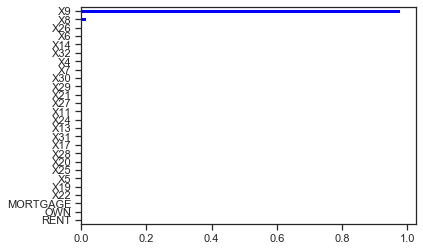

In [54]:
# Understand feature importance in gradient boosting model

importances_gb = pd.Series(gb.feature_importances_, index = X.columns)
# Sort importances_gb
sorted_importances_gb = importances_gb.sort_values()
# Make a horizontal bar plot
sorted_importances_gb.plot(kind='barh', color='blue')
plt.show()

Gradient Boosting is a flexible non-parametric statistical learning technique. It builds an additive model in a forward stage-wise fashion. The idea is to add a classifier at a time, so that the next classifier is trained to improve the already trained ensemble. It is one of the best supervised machine learning algorithms and achieves high accuracy. The disadvantages are that ensembles of trees can be very difficult for people to interpret, requires careful tuning of parameters, and demands high computational power in the training process. Gradient Boosting has the lowest RMSE and thus makes the best predictions among all the models we've run. As seen in the feature importance plot, it mainly uses X9 to shape the model and X8 contributes a little bit. 

# Implement Model on Holdout Data  

In [ ]:
# tried running this but took too long
param_grid = {'n_estimators':[400, 600, 800], 
              'learning_rate': [0.1, 0.05, 0.01], 
              'max_depth':[4,6,8],
              'min_samples_leaf':[3,5,7],
              'min_samples_split':[2, 4, 10]}

gb1 = GradientBoostingRegressor(random_state= SEED)
clf = GridSearchCV(estimator=gb1, param_grid=param_grid,n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_

In [ ]:
# Here's an example of me playing with different parameters to see if better results can be achived. 
# However, considering limitations of computational power, I believe my previous trial of gradient boosting was ideal.


# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,n_estimators=100,random_state=SEED)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Make predictions 
y_pred = gb.predict(X_test)
y_pred_train = gb.predict(X_train)

# Evaluate RMSE of train and test sets 
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)

# Evaluate 10-fold cross validation RMSE
MSE_CV_scores = - cross_val_score(gb, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1) 
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

print('Test set RMSE of Gradient Boosting: {:.3f}'.format(rmse_test))
print('Train set RMSE of Gradient Boosting: {:.3f}'.format(rmse_train))
print('CV RMSE of Gradient Boosting: {:.3f}'.format(RMSE_CV))

In [51]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 26 columns):
X4          80000 non-null int64
X5          80000 non-null int64
X6          80000 non-null int64
X7          80000 non-null int64
X8          80000 non-null float64
X9          80000 non-null int64
X11         80000 non-null float64
X13         80000 non-null float64
X14         80000 non-null int64
X17         80000 non-null int64
X19         80000 non-null int64
X20         80000 non-null int64
X21         80000 non-null float64
X22         80000 non-null int64
X24         80000 non-null int64
X25         80000 non-null float64
X26         80000 non-null float64
X27         80000 non-null int64
X28         80000 non-null int64
X29         80000 non-null int64
X30         80000 non-null float64
X31         80000 non-null int64
X32         80000 non-null int64
MORTGAGE    80000 non-null uint8
OWN         80000 non-null uint8
RENT        80000 non-null uint8
dtypes: float64(7),

In [52]:
pred = gb.predict(holdout)
pred[:15]

array([16.24972622,  6.04817037, 13.96176608, 16.32922579,  9.65490279,
       11.37637098, 14.33450586, 10.60587307, 14.76620887,  6.53798221,
       12.86636591,  8.45945879, 13.74091871, 19.21983334, 10.7174663 ])

In [53]:
test = pd.read_csv('Holdout for Testing.csv')
interest = pd.DataFrame({'LoanId':test['X2'],"X1": pred}) 
interest.to_csv("Loan Results from Ariel Li.csv", index = False)